In [3]:
import pandas as pd 
from functools import reduce
import seaborn as sns

In [4]:
admitted_df = pd.read_csv("./admitted_hospital.csv").drop(["areaName", "areaType"], axis=1)
deaths_df = pd.read_csv("./deaths.csv").drop(["areaName", "areaType"], axis=1)
total_hospital_df = pd.read_csv("./total_in_hospital.csv").drop(["areaName", "areaType"], axis=1)
total_icu_df = pd.read_csv("./total_in_icu.csv").drop(["areaName", "areaType"], axis=1)
total_positives_df = pd.read_csv("./total_positives.csv").drop(["areaName", "areaType"], axis=1)

In [5]:
# merge all csvs
df = reduce(lambda df1, df2: pd.merge(df1, df2, on="date"), [admitted_df, deaths_df, total_hospital_df, total_icu_df, total_positives_df])


In [6]:
# generate new df

n_df = pd.DataFrame()
n_df["data"] = df["date"]
n_df["stato"] = "UK"

n_df["totale_positivi"] = df["hospitalCases"]
n_df["totale_ospedalizzati"] = df["hospitalCases"] - df["covidOccupiedMVBeds"]
n_df["terapia_intensiva"] = df["covidOccupiedMVBeds"]
n_df["totale_casi"] = df["cumCasesByPublishDate"]
n_df["ricoverati_con_sintomi"] = df["hospitalCases"] - df["covidOccupiedMVBeds"]
n_df["deceduti"] = df["cumDeathsByPublishDate"]
n_df["isolamento_domiciliare"] = n_df["totale_positivi"] - df["hospitalCases"]
n_df["dimessi_guariti"] = n_df["totale_casi"] - n_df["totale_positivi"] - n_df["deceduti"]

n_df = n_df.sort_values(by="data").reset_index(drop=True)
n_df = n_df.fillna(-1)
n_df

,data,stato,totale_positivi,totale_ospedalizzati,terapia_intensiva,totale_casi,ricoverati_con_sintomi,deceduti,isolamento_domiciliare,dimessi_guariti
0,2020-03-06,UK,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,-1.0
1,2020-03-07,UK,-1.0,-1.0,-1.0,-1.0,-1.0,2,-1.0,-1.0
2,2020-03-08,UK,-1.0,-1.0,-1.0,-1.0,-1.0,2,-1.0,-1.0
3,2020-03-09,UK,-1.0,-1.0,-1.0,-1.0,-1.0,3,-1.0,-1.0
4,2020-03-10,UK,-1.0,-1.0,-1.0,373.0,-1.0,7,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
114,2020-06-28,UK,3700.0,3430.0,270.0,311151.0,3430.0,43550,0.0,263901.0
115,2020-06-29,UK,3862.0,3600.0,262.0,311965.0,3600.0,43575,0.0,264528.0
116,2020-06-30,UK,3539.0,3260.0,279.0,312654.0,3260.0,43730,0.0,265385.0
117,2020-07-01,UK,-1.0,-1.0,259.0,313483.0,-1.0,43906,-1.0,-1.0


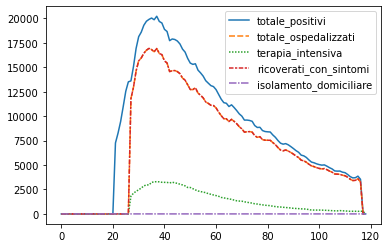

In [7]:
cols = ["totale_positivi", "totale_ospedalizzati", "terapia_intensiva", "ricoverati_con_sintomi", "isolamento_domiciliare"]
sns.lineplot(data=n_df[cols])

In [8]:
n_df.to_csv('uk_data_filled.csv')